<a href="https://colab.research.google.com/github/TaeMD/ML-projects/blob/main/Predicting_CKD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

age - age

● bp - blood pressure

● sg - specific gravity

● al - albumin

● su - sugar

● rbc - red blood cells

● pc - pus cell

● pcc - pus cell clumps

● ba - bacteria

● bgr - blood glucose random

● bu - blood urea

● sc - serum creatinine

● sod - sodium

● pot - potassium

● hemo - hemoglobin

● pcv - packed cell volume

● wc - white blood cell count

● rc - red blood cell count

● htn - hypertension

● dm - diabetes mellitus

● cad - coronary artery disease

● appet - appetite

● pe - pedal edema

● ane - anemia

● class - class

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv ('/content/drive/MyDrive/kidney_disease.csv')

In [3]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


Initial analysis on the dataset

In [4]:
df.shape

(400, 26)

In [5]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [6]:
df.describe(include = 'object')

,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,248,335,396,396,330,295,270,398,398,398,399,399,399,400
unique,2,2,2,2,44,92,49,2,5,3,2,2,2,3
top,normal,normal,notpresent,notpresent,41,9800,5.2,no,no,no,good,no,no,ckd
freq,201,259,354,374,21,11,18,251,258,362,317,323,339,248


#### Examining Missing Values

In [7]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

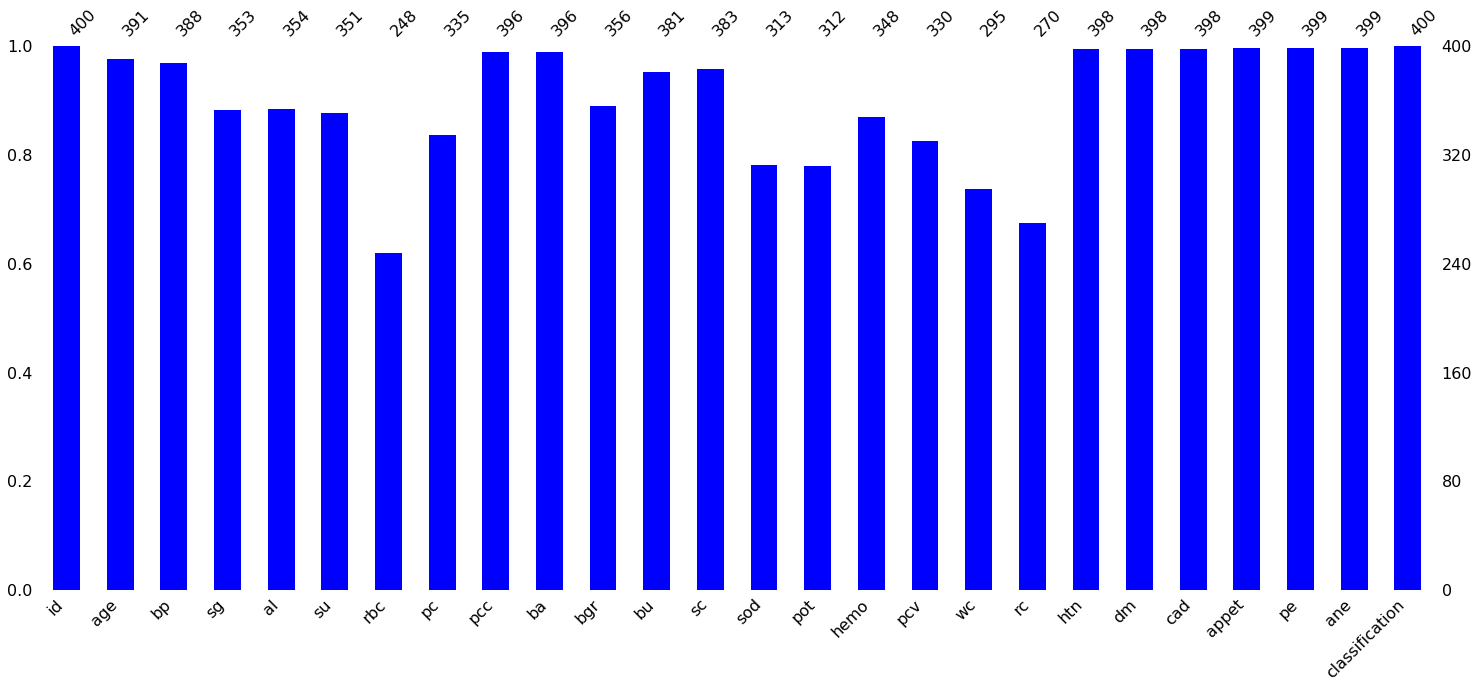

In [8]:
import missingno
missingno.bar(df, color='b')
plt.show()

In [9]:
df['rbc'].value_counts()

normal      201
abnormal     47
Name: rbc, dtype: int64

In [10]:
df.groupby(['al'])['rbc'].value_counts()

al   rbc     
0.0  normal      141
     abnormal      2
1.0  abnormal     12
     normal       10
2.0  normal       17
     abnormal     12
3.0  normal       17
     abnormal     12
4.0  normal       13
     abnormal      8
5.0  abnormal      1
Name: rbc, dtype: int64

It appears that when there is no albuminn in urine it is very likely that rbc is 'normal' than 'abnormal'. Otherwise it is likely 50:50 chance to have 'normal' or 'abnormal'. 

In [11]:
df['al'].value_counts()

0.0    199
1.0     44
2.0     43
3.0     43
4.0     24
5.0      1
Name: al, dtype: int64

We will fill missing values in the rbc column with 'normal' if the corresponding 'al' value is 0. 

In [12]:
df['rbc'] = np.where(df['al'] == 0, df['rbc'].fillna('normal'), df['rbc'])

In [13]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc                96
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [14]:
idx=df.index[df.rbc.isna()]
print(len(idx))
df.loc[np.random.choice(idx, size=int(len(idx)/2) ,replace=False),'rbc']='abnormal'
df['rbc'].isnull().sum()

96


48

In [15]:
df['rbc'] = df['rbc'].fillna('normal')

In [16]:
df['rbc'].isnull().sum()

0

In [17]:
df['rc']

0      5.2
1      NaN
2      NaN
3      3.9
4      4.6
      ... 
395    4.9
396    6.2
397    5.4
398    5.9
399    6.1
Name: rc, Length: 400, dtype: object

In [18]:
df['rc'].astype('float')

ValueError: ignored

In [19]:
print(set(df['rc'].tolist()))

{nan, '6.4', '4.5', '3.6', '3.5', '4.8', '5.9', '2.3', '5.6', '5', '8.0', '3.3', '6.5', '2.6', '2.1', '2.7', '5.5', '6.1', '2.9', '3.9', '3.4', '4.9', '6.3', '3.0', '5.0', '3.1', '4.2', '4.3', '\t?', '6.2', '3', '2.8', '5.4', '5.1', '5.2', '4.4', '4', '2.4', '5.7', '4.7', '5.8', '4.6', '3.7', '2.5', '5.3', '4.0', '6.0', '3.8', '4.1', '3.2'}


In [20]:
df[df['rc'] =='\t?']

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
162,162,59.0,70.0,NaN,NaN,NaN,normal,NaN,notpresent,notpresent,...,37,6000,\t?,no,yes,no,good,no,no,ckd


In [21]:
df.loc[162, 'rc'] = np.nan

In [22]:
df.iloc[[162]]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
162,162,59.0,70.0,NaN,NaN,NaN,normal,NaN,notpresent,notpresent,...,37,6000,NaN,no,yes,no,good,no,no,ckd


In [23]:
df['rc']=df['rc'].astype('float')

In [24]:
df['rc'].describe()

count    269.000000
mean       4.707435
std        1.025323
min        2.100000
25%        3.900000
50%        4.800000
75%        5.400000
max        8.000000
Name: rc, dtype: float64

In [25]:
df['hemo'].describe()

count    348.000000
mean      12.526437
std        2.912587
min        3.100000
25%       10.300000
50%       12.650000
75%       15.000000
max       17.800000
Name: hemo, dtype: float64

In [26]:
df.groupby('hemo')['rc'].mean()

hemo
3.1     2.100000
4.8          NaN
5.5     2.800000
5.6     2.600000
5.8          NaN
          ...   
17.4    5.700000
17.5    4.700000
17.6    5.000000
17.7    5.500000
17.8    5.066667
Name: rc, Length: 115, dtype: float64

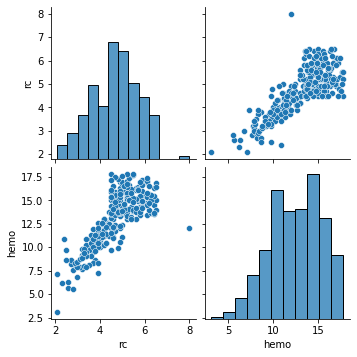

In [27]:
sns.pairplot(df[['rc', 'hemo']])

In [28]:
df['rc'] = df.groupby('hemo')['rc'].apply(lambda x:x.fillna(x.mean()))

In [29]:
df['rc']

0      5.200
1      3.825
2      3.800
3      3.900
4      4.600
       ...  
395    4.900
396    6.200
397    5.400
398    5.900
399    6.100
Name: rc, Length: 400, dtype: float64

In [30]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,rc
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,333.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,4.579968
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,0.990329
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,2.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,3.850000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,4.600000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,5.300000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,8.000000


In [31]:
df['rc'].value_counts().count()

65

In [32]:
unique_number = []

for i in df.columns:
  n = df[i].value_counts().count()
  unique_number.append(n)

uni_df = pd.DataFrame(unique_number, index= df.columns, columns = ['Total Unique Values'])

In [33]:
na = df.isnull().sum()
na_df = pd.DataFrame(na, index = df.columns)

In [34]:
pd.concat([uni_df, na_df], axis=1)

,Total Unique Values,0
id,400,0
age,76,9
bp,10,12
sg,5,47
al,6,46
su,6,49
rbc,2,0
pc,2,65
pcc,2,4
ba,2,4


In [35]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [36]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()

In [37]:
imputer = imputer.fit(df[['age', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']])

ValueError: ignored

In [50]:
for i in df.columns:
  print('\n-------------',i,'------------------')
  print(set(df[i].tolist()))


------------- id ------------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 21